In [1]:
from experiment_visualizer import ExperimentVisualizer
from ray_runner import RayRunnerAPI


In [2]:
seeds = [184, 243, 161, 109, 165]
check_dicts = []
viz_list = []
for seed in seeds:
    checkpoint_dict = RayRunnerAPI.call_simulator(
                'ASHA',
                num_samples=100,
                max_num_epochs=100,
                gpus_per_trial=0,
                cpus_per_trial=1,
                num_actors=16,
                seed=seed,
                verbose=1,
                save_dir="test")
    check_dicts.append(checkpoint_dict)

    viz = ExperimentVisualizer(checkpoint_dict=checkpoint_dict)
    viz_list.append(viz)
    viz.plot_loss_curves(f"{viz.simulation_name}-loss-curve.png")
    viz.get_heatmap(f"{viz.simulation_name}-heatmap.png")
    viz.calculate_regret()
    viz.plot_average_regret(f"{viz.simulation_name}-average-regret.png")
    viz.plot_cumulative_regret(f"{viz.simulation_name}-cumulative-regret.png")

Moving data to checkpoint csv
Saving results at /Users/amishra/DHPOSS/DHPOSS/simulator/test
done.


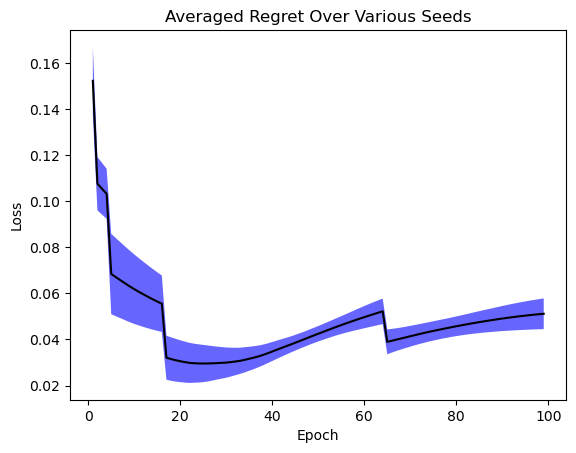

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

cumulative_avg = np.vstack([viz.average_regret for viz in viz_list])
x = list(range(1, 100))
y = np.mean(cumulative_avg, axis=0)
error = np.std(cumulative_avg, axis=0)
plt.plot(x, y, 'k')
plt.fill_between(x, y-error, y+error,
    alpha=0.6, facecolor='blue',
    linewidth=0)
plt.title("Averaged Regret Over Various Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.savefig("og_avg_regret.png")

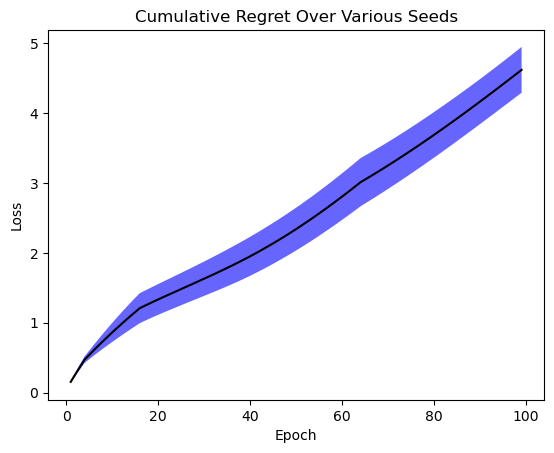

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

cumulative_avg = np.vstack([viz.cumulative_regret for viz in viz_list])
x = list(range(1, 100))
y = np.mean(cumulative_avg, axis=0)
error = np.std(cumulative_avg, axis=0)
plt.plot(x, y, 'k')
plt.fill_between(x, y-error, y+error,
    alpha=0.6, facecolor='blue',
    linewidth=0)
plt.title("Cumulative Regret Over Various Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.savefig("og_cum_regret.png")

Moving data to checkpoint csv
Saving results at /Users/amishra/DHPOSS/DHPOSS/simulator/test
done.


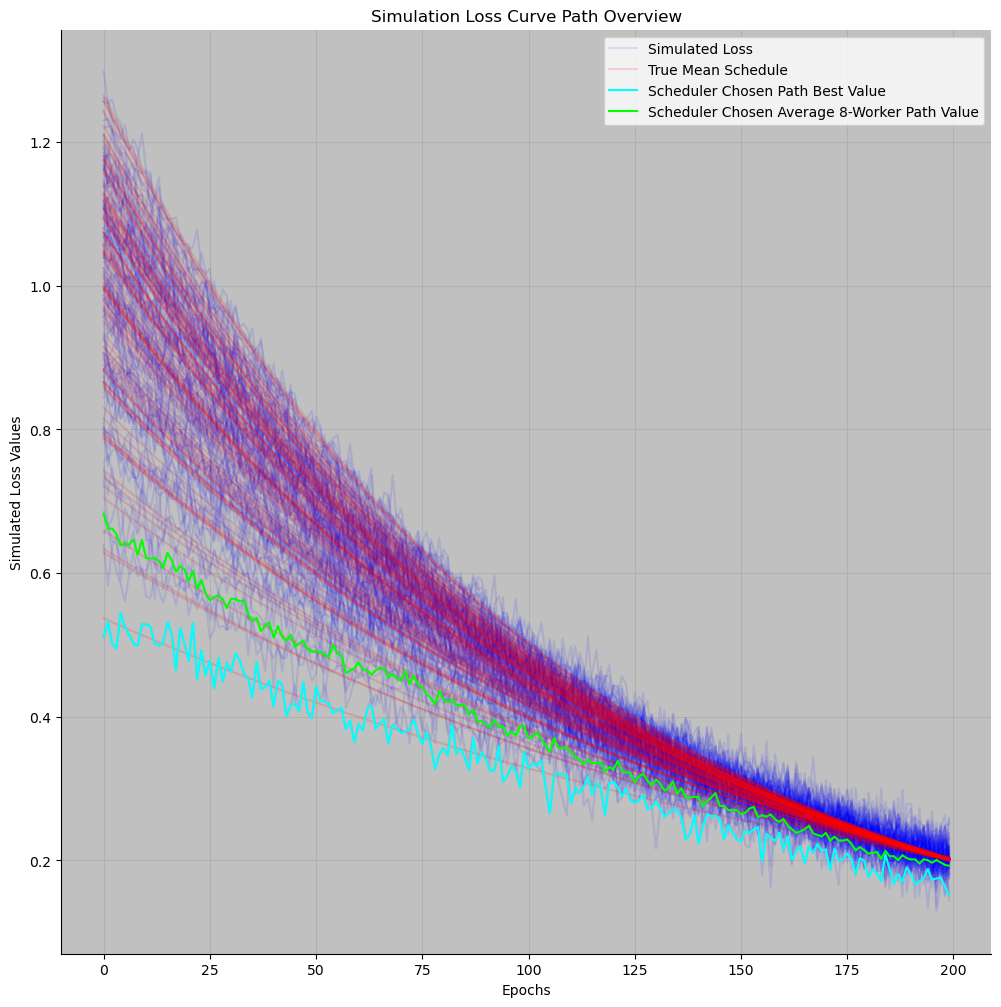

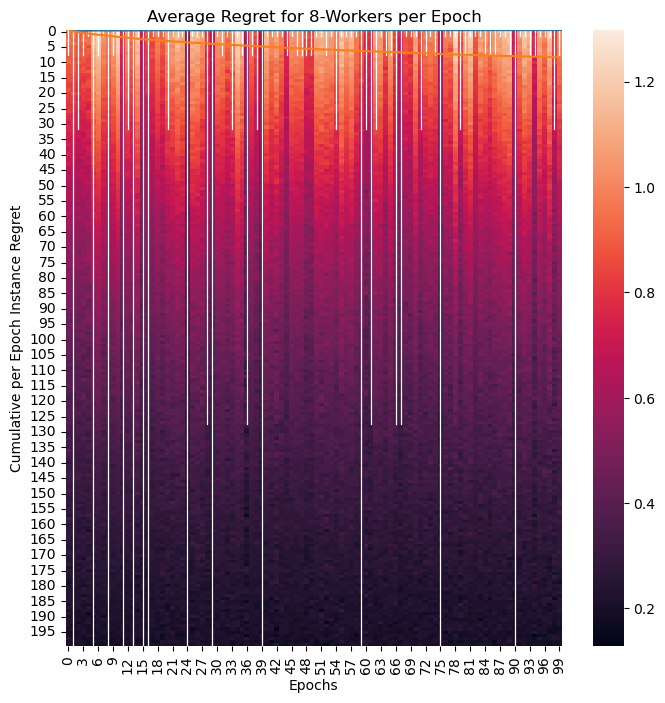

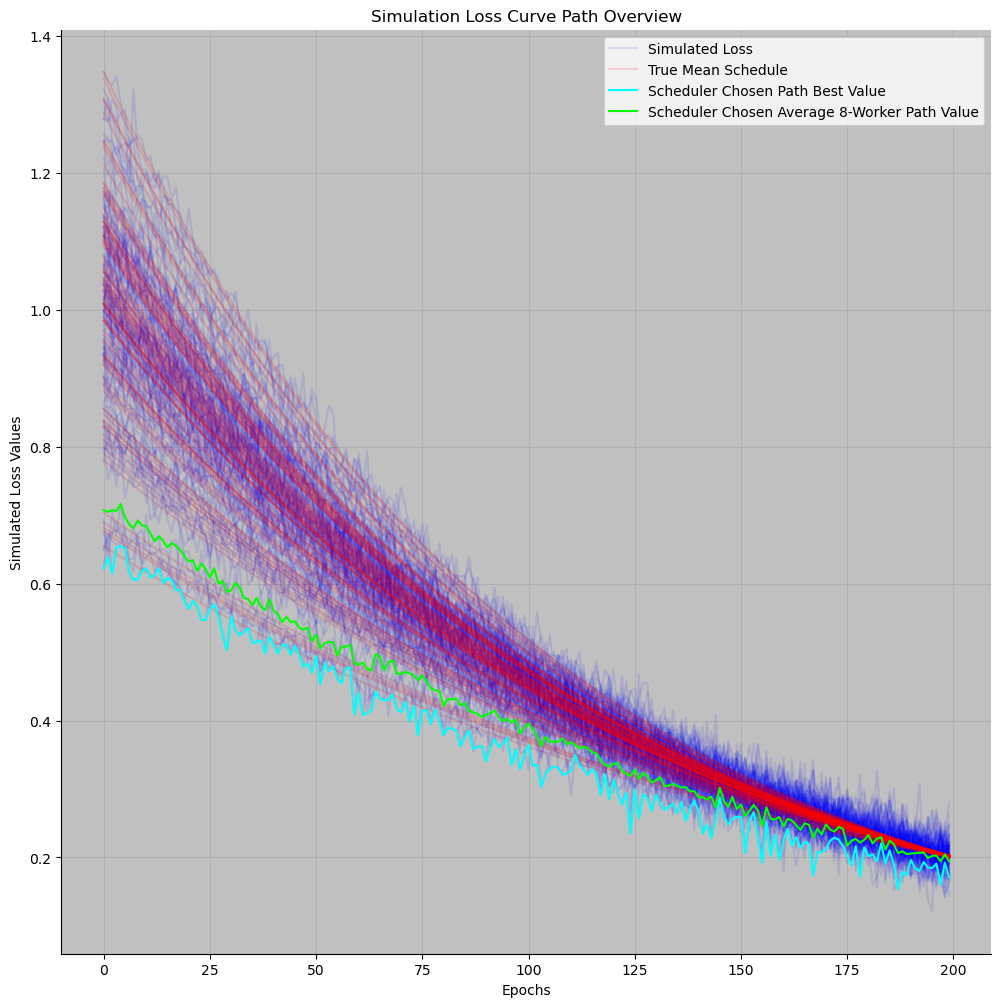

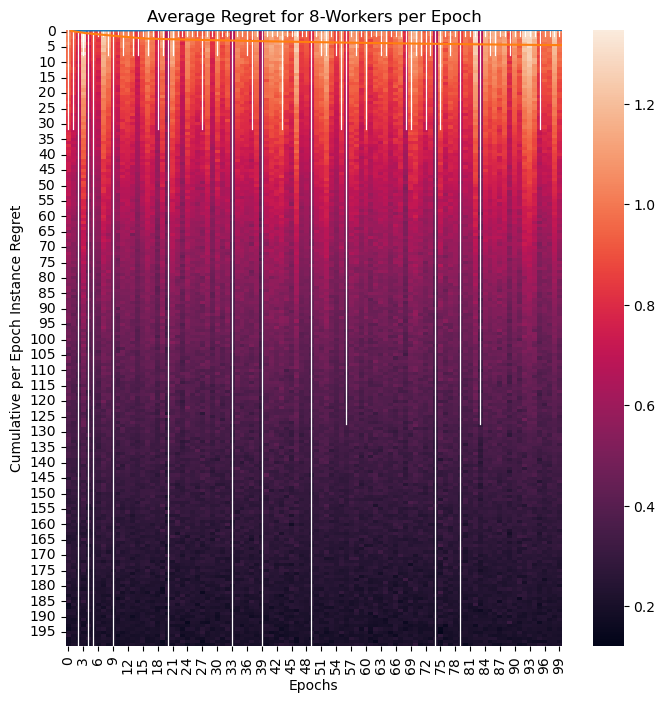

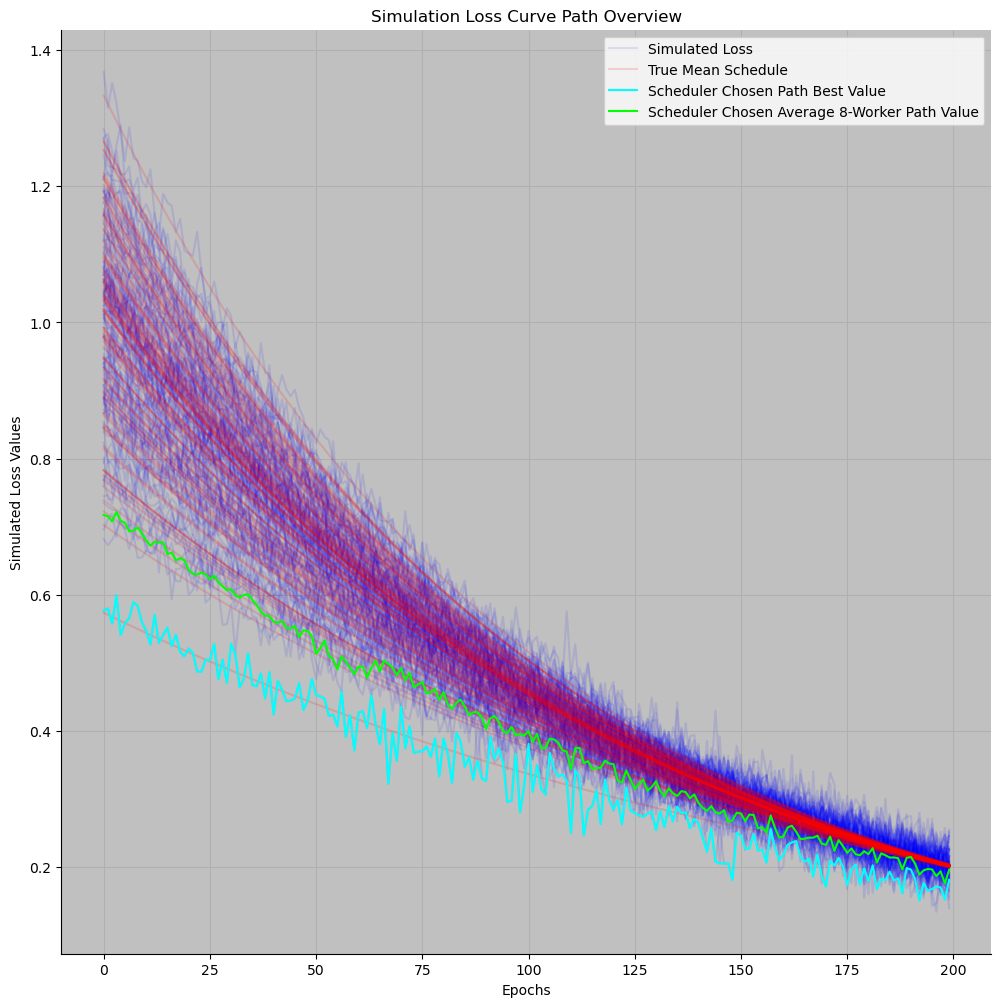

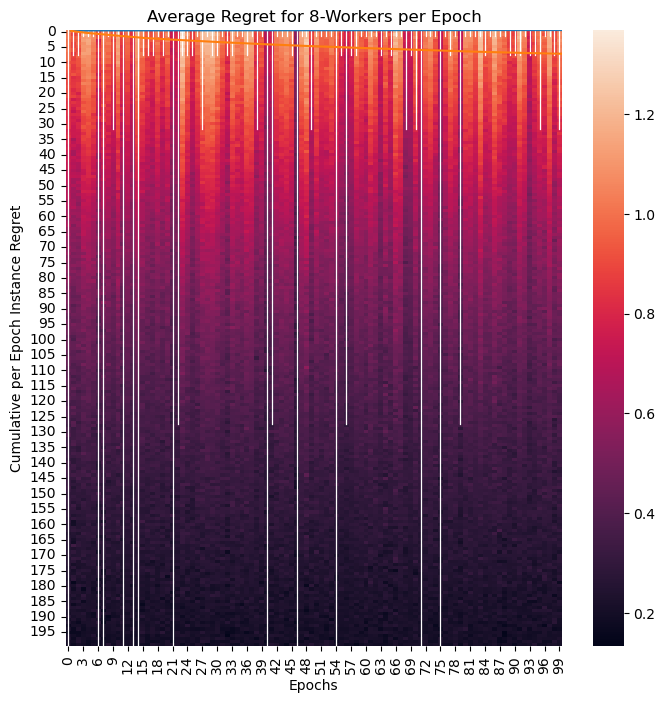

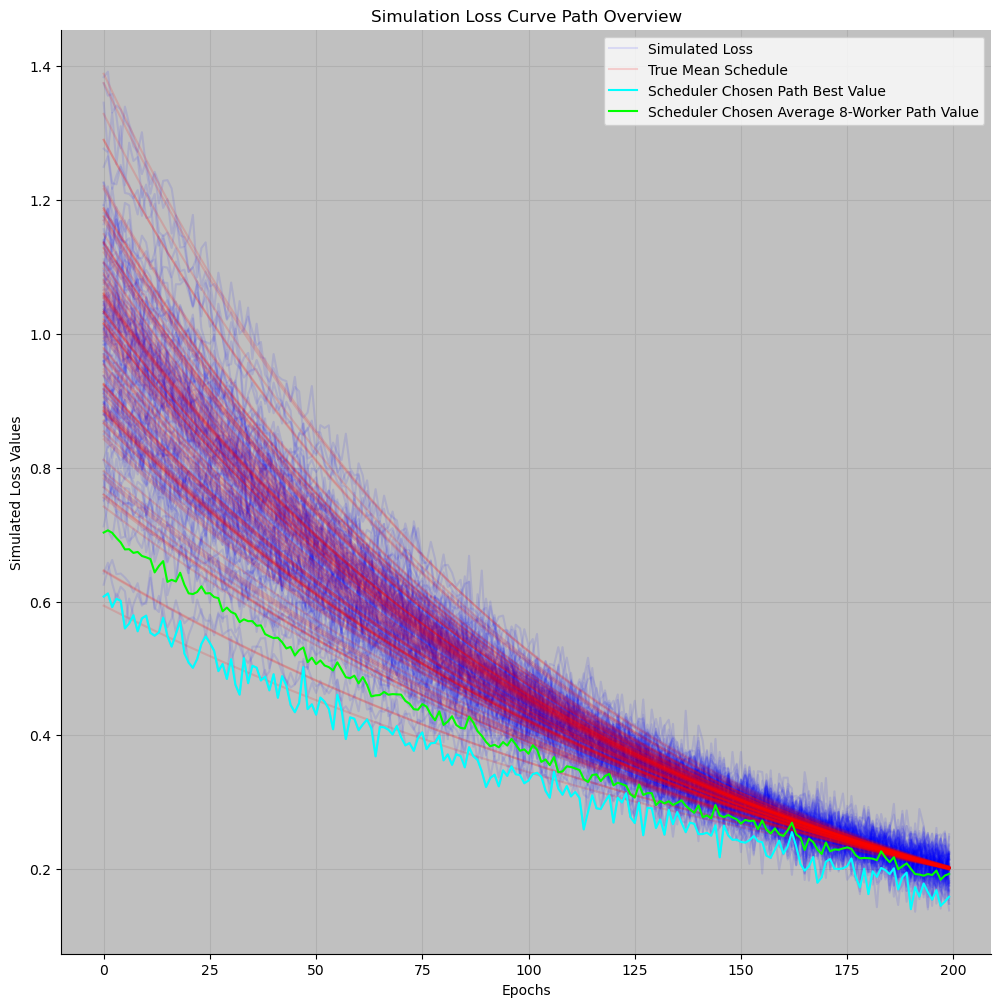

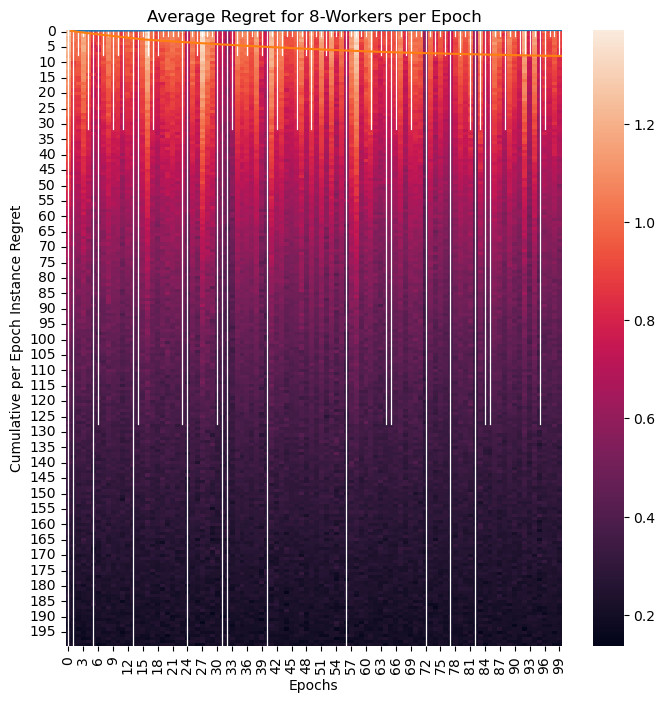

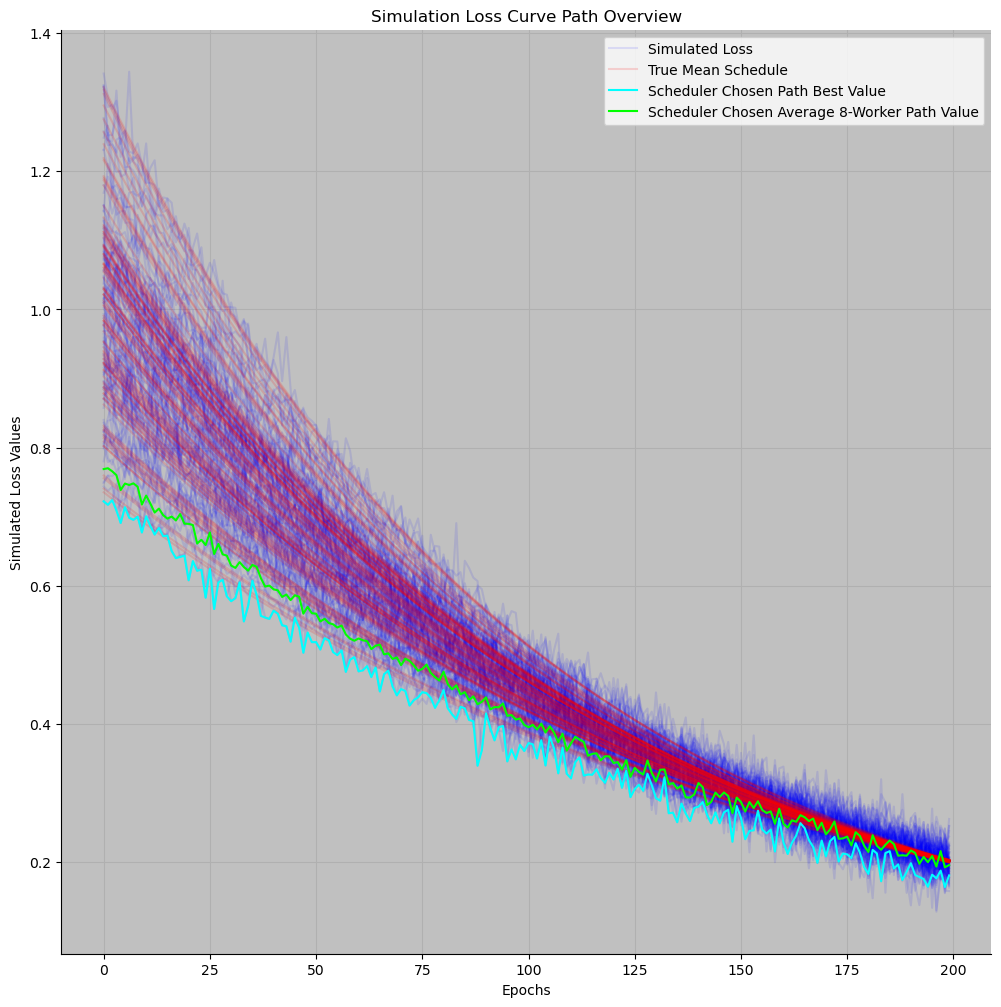

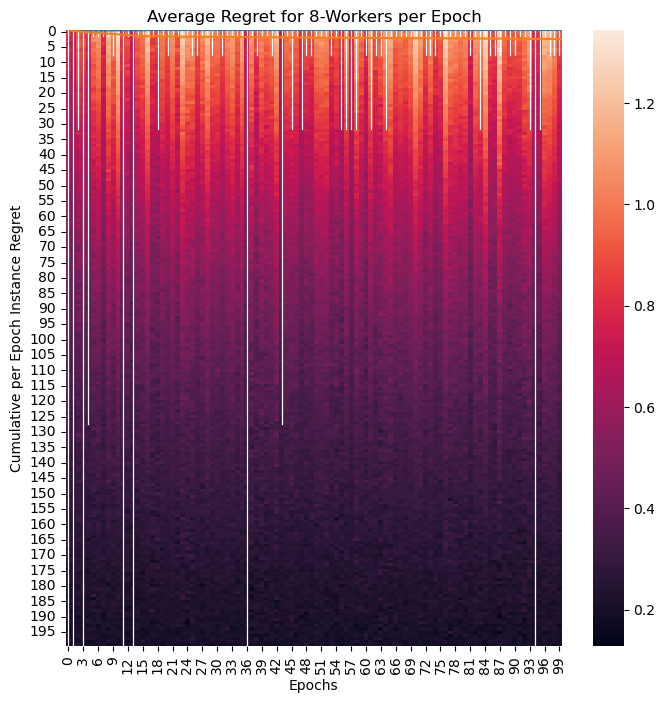

In [8]:
seeds = [121, 124, 182, 265, 282]
check_dicts = []
viz_list = []
for seed in seeds:
    checkpoint_dict = RayRunnerAPI.call_simulator(
                'ASHA',
                num_samples=100,
                max_num_epochs=200,
                gpus_per_trial=0,
                cpus_per_trial=1,
                num_actors=8,
                seed=seed,
                verbose=1,
                save_dir="test")
    check_dicts.append(checkpoint_dict)

    viz = ExperimentVisualizer(checkpoint_dict=checkpoint_dict)
    viz_list.append(viz)
    viz.plot_loss_curves(f"{viz.simulation_name}-loss-curve.png")
    viz.get_heatmap(f"{viz.simulation_name}-heatmap.png")
    viz.calculate_regret()
    viz.plot_average_regret(f"{viz.simulation_name}-average-regret.png")
    viz.plot_cumulative_regret(f"{viz.simulation_name}-cumulative-regret.png")

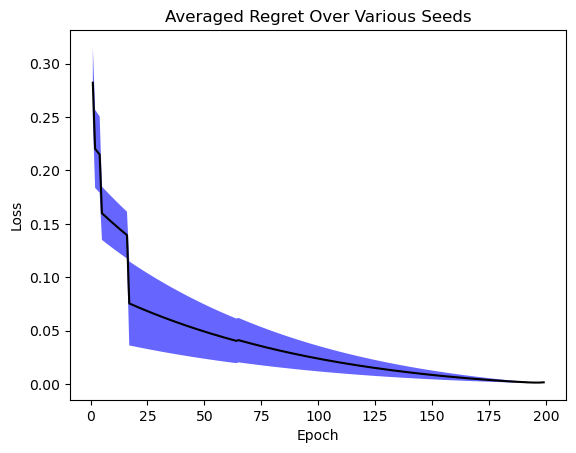

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

cumulative_avg = np.vstack([viz.average_regret for viz in viz_list])
x = list(range(1, 200))
y = np.mean(cumulative_avg, axis=0)
error = np.std(cumulative_avg, axis=0)
plt.plot(x, y, 'k')
plt.fill_between(x, y-error, y+error,
    alpha=0.6, facecolor='blue',
    linewidth=0)
plt.title("Averaged Regret Over Various Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.savefig("og_avg_regret.png")

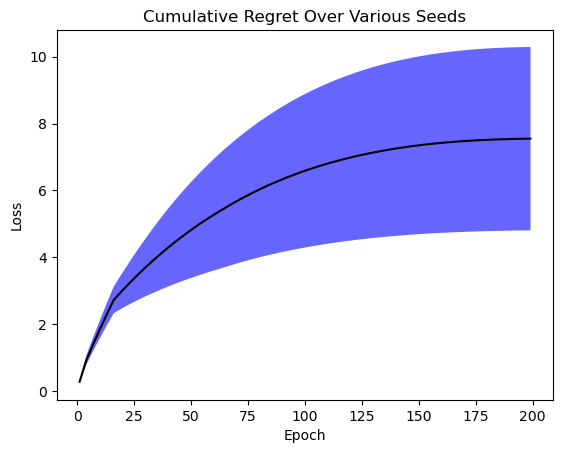

<Figure size 640x480 with 0 Axes>

In [12]:

cumulative_avg = np.vstack([viz.cumulative_regret for viz in viz_list])
x = list(range(1, 200))
y = np.mean(cumulative_avg, axis=0)
error = np.std(cumulative_avg, axis=0)
plt.plot(x, y, 'k')
plt.fill_between(x, y-error, y+error,
    alpha=0.6, facecolor='blue',
    linewidth=0)
plt.title("Cumulative Regret Over Various Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.savefig("og_cum_regret.png")

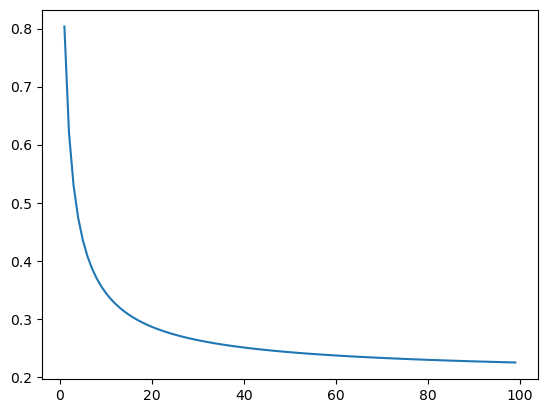

In [22]:
class ParametricModel:
    def __init__(self, alpha, beta0, beta1, beta2, beta3):
        self.beta0 = beta0
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.alpha = alpha
    def predict(self, t):
        return self.beta0 + self.beta1 / ((t + self.beta2)**self.alpha + self.beta3)

t = np.arange(1, 100)
loss = ParametricModel(0.8, 0.2, 1, 0.2, 0.5).predict(t)
plt.plot(t, loss)